# Bring in libraries

In [123]:
import tensorflow as tf

import sklearn

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# Set Configs

In [88]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.set_printoptions(linewidth=5000)

# Set Constants

In [9]:
RANDOM_SEED_FOR_REPRODUCABILITY = 777

# Bring in data sets

In [71]:
( X_train_raw, y_train_raw ), ( X_test_raw, y_test_raw ) = tf.keras.datasets.mnist.load_data()

# X_train_raw, X_train_raw.ndim, X_train_raw.shape, y_train_raw, X_test_raw, y_test_raw

# Shuffle datasets

In [75]:
X_train_shuffled, y_train_shuffled = sklearn.utils.shuffle(X_train_raw, y_train_raw, random_state=RANDOM_SEED_FOR_REPRODUCABILITY)

X_test_shuffled, y_test_shuffled = sklearn.utils.shuffle(X_test_raw, y_test_raw, random_state=RANDOM_SEED_FOR_REPRODUCABILITY)

# y_train_raw

# Normalize example (X) datasets

In [81]:
max_example_data_value = tf.math.reduce_max(X_train_shuffled)

assert max_example_data_value == 255, "Expected max value to be 255"

min_exampled_data_value = tf.math.reduce_min(X_train_shuffled)

assert min_exampled_data_value == 0, "Expected min value to be 0"

X_train_normalized = X_train_shuffled / max_example_data_value

X_test_normalized = X_test_shuffled / max_example_data_value

# One-hot encode label (y) datasets

In [82]:
y_train_one_hot_encoded = tf.keras.utils.to_categorical(y_train_shuffled)

y_test_one_hot_encoded = tf.keras.utils.to_categorical(y_test_shuffled)

# Validate and accept datasets

In [97]:
# sample_index = 3

# X_train_shuffled[sample_index], X_train_normalized[sample_index], y_train_shuffled[sample_index], y_train_one_hot_encoded[sample_index], X_test_shuffled[sample_index], X_test_normalized[sample_index], y_test_shuffled[sample_index], y_test_one_hot_encoded[sample_index]

In [106]:
X_train = tf.expand_dims(X_train_normalized, axis=-1)
y_train = y_train_one_hot_encoded

X_test = tf.expand_dims(X_test_normalized, axis=-1)
y_test = y_test_one_hot_encoded

len(y_train[0])

10

# Create data model architecture and train

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (60000, 28, 28, 50)       500       
                                                                 
 max_pooling2d_6 (MaxPooling  (60000, 14, 14, 50)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (60000, 14, 14, 50)       22550     
                                                                 
 max_pooling2d_7 (MaxPooling  (60000, 7, 7, 50)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (60000, 7, 7, 50)         22550     
                                                                 
 max_pooling2d_8 (MaxPooling  (60000, 3, 3, 50)       

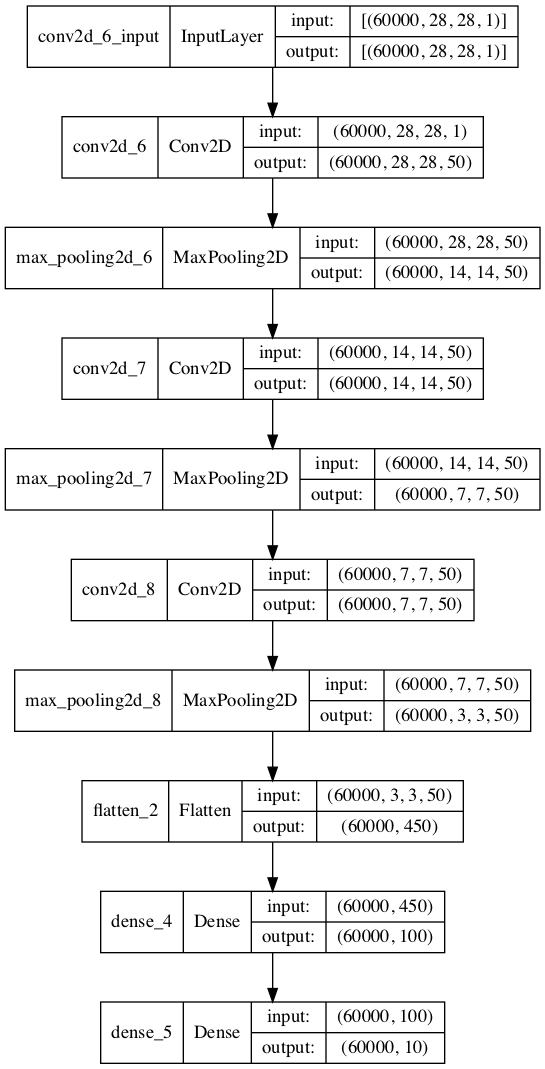

In [110]:
tf.random.set_seed(RANDOM_SEED_FOR_REPRODUCABILITY)

model_001 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(50, (3, 3), padding="same", activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    
    tf.keras.layers.Dense(len(y_train[0]), activation=tf.keras.activations.softmax)
])

model_001.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[ "accuracy" ]
)

model_001.build(input_shape=X_train.shape)

model_001.summary()

tf.keras.utils.plot_model(model_001, show_shapes=True)

In [111]:
def learning_rate_schedule(current_epoch, current_learning_rate):
    return current_learning_rate

model_001_history = model_001.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(schedule=learning_rate_schedule),
        tf.keras.callbacks.EarlyStopping(
            restore_best_weights=True,
            monitor="val_accuracy",
            patience=5
        )
    ]
)

Epoch 1/25
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1409 - accuracy: 0.9563 - val_loss: 0.0439 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0323 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 3/25
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0246 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 4/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0318 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 5/25
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0374 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 6/25
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0305 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 7/25
1875/1875 [========================

In [113]:
model_001.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9933


[0.03125965595245361, 0.9933000206947327]

In [119]:
pd.DataFrame(model_001_history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.140944,0.956283,0.043943,0.9867,0.001
1,0.045142,0.985950,0.032257,0.9899,0.001
2,0.032495,0.989367,0.024553,0.9917,0.001
3,0.025472,0.991433,0.031756,0.9896,0.001
4,0.020544,0.993400,0.037420,0.9886,0.001
5,0.016406,0.994667,0.030508,0.9912,0.001
6,0.013296,0.995767,0.039545,0.9885,0.001
7,0.013043,0.995433,0.028211,0.9920,0.001
8,0.009285,0.996800,0.034325,0.9906,0.001
9,0.009784,0.996733,0.036815,0.9895,0.001


Text(0.5, 0, 'epochs')

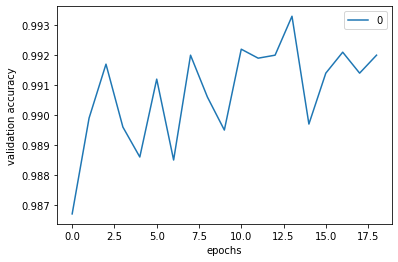

In [125]:
pd.DataFrame(model_001_history.history["val_accuracy"]).plot()
plt.ylabel("validation accuracy")
plt.xlabel("epochs")